In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv("train.csv")

In [5]:
train_data

,income,infant,region,oil
0,281,180.0,Africa,no
1,110,125.0,Asia,yes
2,123,100.0,Asia,no
3,335,65.1,Americas,no
4,75,400.0,Asia,no
5,1000,71.5,Africa,no
6,507,46.0,Americas,no
7,295,32.0,Asia,no
8,2298,25.7,Europe,no
9,71,NaN,Asia,no


In [6]:
train_data.describe()

,income,infant
count,84.000000,80.000000
mean,969.238095,92.267500
std,1402.084091,96.693918
min,50.000000,9.600000
25%,117.500000,26.800000
50%,334.000000,61.850000
75%,1047.750000,130.275000
max,5596.000000,650.000000


In [7]:
def label_encoding(data, name, le=None):
    if le is None:
        le = LabelEncoder()
        le = le.fit(list(set(data[name])))
    data[name] = le.transform(data[name])
    return le

label_encoding(train_data, 'oil')
label_encoding(train_data, 'region')

LabelEncoder()

In [15]:
train_data.corr()

,income,infant,region,oil
income,1.000000,-0.291310,0.487826,0.018219
infant,-0.291310,1.000000,-0.351509,0.310175
region,0.487826,-0.351509,1.000000,-0.024698
oil,0.018219,0.310175,-0.024698,1.000000


80


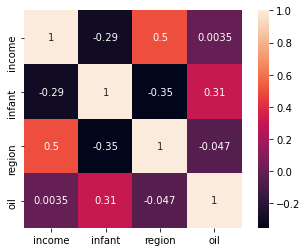

In [19]:
data = train_data.dropna()
print(len(data))
correlation_matrix = data.corr()
fig = plt.figure()
sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True)
plt.show()

In [17]:
X = []
y = []

for index, row in data.iterrows():
    X.append([row['oil'], row['region']])
    y.append(row['infant'])

X = np.array([x for x in X])
    
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.20994624398919548
[100.05936882 -29.13539508]
121.75251127105909


In [21]:
for index, row in train_data.iterrows():
    if pd.isnull(row['infant']):
        train_data.iloc[index, data.columns.get_loc('infant')] = reg.predict(np.array([[row['oil'], row['region']]]))[0]
        print(row['infant'])
print(train_data)

nan
nan
nan
nan
    income      infant  region  oil
0      281  180.000000       0    0
1      110  125.000000       2    1
2      123  100.000000       2    0
3      335   65.100000       1    0
4       75  400.000000       2    0
5     1000   71.500000       0    0
6      507   46.000000       1    0
7      295   32.000000       2    0
8     2298   25.700000       3    0
9       71   63.481721       2    0
10    4103   11.600000       3    0
11      77   50.000000       2    0
12      70  160.000000       0    0
13    1240   51.700000       1    1
14      81  109.600000       0    0
15    3312   10.100000       3    0
16     344   58.000000       2    0
17     210  114.000000       0    0
18     631   13.600000       2    0
19    1760   27.800000       3    0
20    5596    9.600000       3    0
21     347   38.600000       1    0
22     406   48.800000       1    0
23    5040   20.400000       3    0
24     754   34.100000       1    0
25     334   21.700000       2    0
26     210  